# I) DATA INSPECTION

1) IMPORT LIBRARIES USED AND THE BREAST CANCER DATASET

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [46]:
df = pd.read_csv('HPV.csv')

In [47]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),DxHPV
0,18,4,15,1,0.0,0.0,0.00,0.0,0,0
1,15,1,14,1,0.0,0.0,0.00,0.0,0,0
2,34,1,17,1,0.0,0.0,0.00,0.0,0,0
3,52,5,16,4,37.0,37.0,3.00,0.0,0,1
4,46,3,21,4,0.0,0.0,15.00,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
853,34,3,18,0,0.0,0.0,0.00,0.0,0,0
854,32,2,19,1,0.0,0.0,8.00,0.0,0,0
855,25,2,17,0,0.0,0.0,0.08,0.0,0,0
856,33,2,24,2,0.0,0.0,0.08,0.0,0,0


2) SHAPE OF DATA AND GENERAL DESCRIPTIONS

In [48]:
df.shape

(858, 10)

In [49]:
#(858,10) means dataset includes 858 datapoints with 10 features (attributes)
#The last attribute ('Schiller') is the target column (supervised label)

In [50]:
#Data general statistical numbers
df_stats=df.describe().round(decimals=2)
df_stats

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),DxHPV
count,858.00,858.00,858.00,858.00,858.00,858.00,858.00,858.00,858.00,858.00
mean,26.82,2.51,17.00,2.26,1.20,0.45,2.04,0.44,0.16,0.02
std,8.50,1.64,2.79,1.40,4.06,2.21,3.57,1.81,0.53,0.14
min,13.00,1.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,20.00,2.00,15.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,25.00,2.00,17.00,2.00,0.00,0.00,0.50,0.00,0.00,0.00
75%,32.00,3.00,18.00,3.00,0.00,0.00,2.00,0.00,0.00,0.00
max,84.00,28.00,32.00,11.00,37.00,37.00,30.00,19.00,4.00,1.00


As we can see from the table, the number of attribute vectors, their mean, standard deviation, minimum/maximum, 1st-2nd-3rd quartiles

In [51]:
#Data Correlation matrix
cor_matrix=df.corr().round(decimals=1)
cor_matrix

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),DxHPV
Age,1.0,0.1,0.4,0.5,0.2,0.1,0.3,0.2,-0.0,0.1
Number of sexual partners,0.1,1.0,-0.1,0.1,0.2,0.2,0.0,0.0,0.0,0.0
First sexual intercourse,0.4,-0.1,1.0,-0.1,-0.1,-0.1,0.0,-0.0,0.0,0.0
Num of pregnancies,0.5,0.1,-0.1,1.0,0.2,0.1,0.2,0.1,0.0,0.0
Smokes (years),0.2,0.2,-0.1,0.2,1.0,0.7,0.1,0.0,0.1,0.1
Smokes (packs/year),0.1,0.2,-0.1,0.1,0.7,1.0,0.0,0.0,0.0,0.1
Hormonal Contraceptives (years),0.3,0.0,0.0,0.2,0.1,0.0,1.0,0.0,-0.0,0.1
IUD (years),0.2,0.0,-0.0,0.1,0.0,0.0,0.0,1.0,0.0,0.0
STDs (number),-0.0,0.0,0.0,0.0,0.1,0.0,-0.0,0.0,1.0,-0.0
DxHPV,0.1,0.0,0.0,0.0,0.1,0.1,0.1,0.0,-0.0,1.0


This matrix is a significant tool to get insights of the correlation between different fields. Values range from -1 to 1, the more the absolute value of them closer to one, the stronger the relationship becomes. Their sign illustrate types of relationship ('-' : negative relationship, '+' : positive relationship)

For instance, we take the correlation between quality and other attributes, it is evident to see that alcohol has the largest correlation (0.476) and positive relationship with quality. That means the higher the wine alcohol level is, the better it becomes

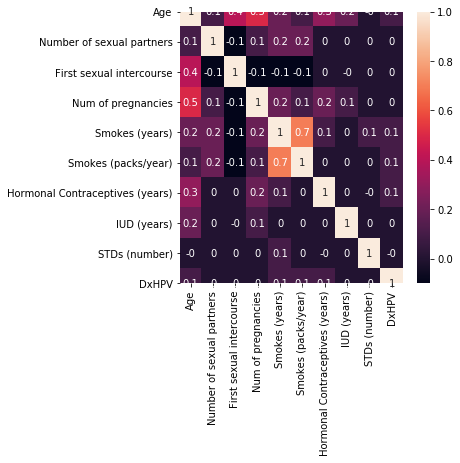

In [52]:
#We can visualize this correlation matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(cor_matrix, annot = True, ax=ax)

# II) DATA CLEANING AND TRANSFORMATION

1) DEALING WITH NULL VALUES

In [53]:
df.isnull().any()

Age                                False
Number of sexual partners          False
First sexual intercourse           False
Num of pregnancies                 False
Smokes (years)                     False
Smokes (packs/year)                False
Hormonal Contraceptives (years)    False
IUD (years)                        False
STDs (number)                      False
DxHPV                              False
dtype: bool

There is not any missing values in the dataset

Look back to the statistical description of dataframe

In [54]:
df_stats=df.describe().round(decimals=2)
df_stats

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),DxHPV
count,858.00,858.00,858.00,858.00,858.00,858.00,858.00,858.00,858.00,858.00
mean,26.82,2.51,17.00,2.26,1.20,0.45,2.04,0.44,0.16,0.02
std,8.50,1.64,2.79,1.40,4.06,2.21,3.57,1.81,0.53,0.14
min,13.00,1.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,20.00,2.00,15.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,25.00,2.00,17.00,2.00,0.00,0.00,0.50,0.00,0.00,0.00
75%,32.00,3.00,18.00,3.00,0.00,0.00,2.00,0.00,0.00,0.00
max,84.00,28.00,32.00,11.00,37.00,37.00,30.00,19.00,4.00,1.00


It's obvious that whereas some features have highly larger than '1.0' range as: ..... This difference might affect classification depends on distance such as KNeighbor. Moreover, some learning algorithms don't work very well if the features have a different set of values. For this reason we need to apply a proper scaling system.

The scaling system I choose here is Standardization

In [55]:
from sklearn.preprocessing import StandardScaler as Scaler

scaler = Scaler()
scaler.fit(df.iloc[:,:9])
df_scaled = scaler.transform(df.iloc[:,:9])

In [56]:
#Scaled values become a 2D array
df_scaled

array([[-1.03856336e+00,  9.05429457e-01, -7.15109408e-01, ...,
        -5.70926728e-01, -2.45209271e-01, -2.92857071e-01],
       [-1.39179566e+00, -9.19610028e-01, -1.07349952e+00, ...,
        -5.70926728e-01, -2.45209271e-01, -2.92857071e-01],
       [ 8.45342268e-01, -9.19610028e-01,  1.67081637e-03, ...,
        -5.70926728e-01, -2.45209271e-01, -2.92857071e-01],
       ...,
       [-2.14354647e-01, -3.11263533e-01,  1.67081637e-03, ...,
        -5.48486090e-01, -2.45209271e-01, -2.92857071e-01],
       [ 7.27598166e-01, -3.11263533e-01,  2.51040160e+00, ...,
        -5.48486090e-01, -2.45209271e-01, -2.92857071e-01],
       [ 2.56621760e-01, -3.11263533e-01,  1.07684115e+00, ...,
        -4.30672736e-01, -2.45209271e-01, -2.92857071e-01]])

In [57]:
#Return this 2D array back to dataframe, however the 'quality' column is removed
scaled_df = pd.DataFrame(df_scaled)

In [58]:
scaled_df

,0,1,2,3,4,5,6,7,8
0,-1.038563,0.905429,-0.715109,-0.898163,-0.295999,-0.202021,-0.570927,-0.245209,-0.292857
1,-1.391796,-0.919610,-1.073500,-0.898163,-0.295999,-0.202021,-0.570927,-0.245209,-0.292857
2,0.845342,-0.919610,0.001671,-0.898163,-0.295999,-0.202021,-0.570927,-0.245209,-0.292857
3,2.964736,1.513776,-0.356719,1.244442,8.821219,16.547162,0.270597,-0.245209,-0.292857
4,2.258271,0.297083,1.435231,1.244442,-0.295999,-0.202021,3.636693,-0.245209,-0.292857
...,...,...,...,...,...,...,...,...,...
853,0.845342,0.297083,0.360061,-1.612364,-0.295999,-0.202021,-0.570927,-0.245209,-0.292857
854,0.609854,-0.311264,0.718451,-0.898163,-0.295999,-0.202021,1.673137,-0.245209,-0.292857
855,-0.214355,-0.311264,0.001671,-1.612364,-0.295999,-0.202021,-0.548486,-0.245209,-0.292857
856,0.727598,-0.311264,2.510402,-0.183961,-0.295999,-0.202021,-0.548486,-0.245209,-0.292857


In [59]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),DxHPV
0,18,4,15,1,0.0,0.0,0.00,0.0,0,0
1,15,1,14,1,0.0,0.0,0.00,0.0,0,0
2,34,1,17,1,0.0,0.0,0.00,0.0,0,0
3,52,5,16,4,37.0,37.0,3.00,0.0,0,1
4,46,3,21,4,0.0,0.0,15.00,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
853,34,3,18,0,0.0,0.0,0.00,0.0,0,0
854,32,2,19,1,0.0,0.0,8.00,0.0,0,0
855,25,2,17,0,0.0,0.0,0.08,0.0,0,0
856,33,2,24,2,0.0,0.0,0.08,0.0,0,0


In [60]:
#Add the target column(quality)
scaled_df['10']=df['DxHPV']

In [61]:
#Return the original names of these columns
scaled_df.columns=df.columns

In [62]:
#DataFrame showing
scaled_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),DxHPV
0,-1.038563,0.905429,-0.715109,-0.898163,-0.295999,-0.202021,-0.570927,-0.245209,-0.292857,0
1,-1.391796,-0.919610,-1.073500,-0.898163,-0.295999,-0.202021,-0.570927,-0.245209,-0.292857,0
2,0.845342,-0.919610,0.001671,-0.898163,-0.295999,-0.202021,-0.570927,-0.245209,-0.292857,0
3,2.964736,1.513776,-0.356719,1.244442,8.821219,16.547162,0.270597,-0.245209,-0.292857,1
4,2.258271,0.297083,1.435231,1.244442,-0.295999,-0.202021,3.636693,-0.245209,-0.292857,0
...,...,...,...,...,...,...,...,...,...,...
853,0.845342,0.297083,0.360061,-1.612364,-0.295999,-0.202021,-0.570927,-0.245209,-0.292857,0
854,0.609854,-0.311264,0.718451,-0.898163,-0.295999,-0.202021,1.673137,-0.245209,-0.292857,0
855,-0.214355,-0.311264,0.001671,-1.612364,-0.295999,-0.202021,-0.548486,-0.245209,-0.292857,0
856,0.727598,-0.311264,2.510402,-0.183961,-0.295999,-0.202021,-0.548486,-0.245209,-0.292857,0


In [64]:
# The following code ensure there isnt any NaN value in quality caused by misindexing
scaled_df['DxHPV'].isnull().any()

False

As we can see now all the attributes (except the target column) are successfully normally standardized about the mean

## Saving the data set

In [65]:
scaled_df.to_excel('scaled-hpv.xls', index = False)

## Saving the scaler

In [66]:
import pickle

In [67]:
pickle.dump(scaler,open('scaler-hpv','wb'))